In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote 
# df = web.DataReader('TCS.NS', data_source='yahoo', start='2012-01-01', end='2021-06-29') 
df = pd.read_csv("Dataset/TCS.csv")
# droping null values
df = df.dropna()
#Show the data 
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1683,2011-06-01,TCS,EQ,1157.15,1157.00,1177.00,1157.00,1174.70,1175.40,1171.25,491193,5.753106e+13,24427.0,235463,0.4794
1684,2011-06-02,TCS,EQ,1175.40,1158.90,1172.00,1156.65,1170.00,1167.75,1163.45,848827,9.875700e+13,31879.0,505320,0.5953
1685,2011-06-03,TCS,EQ,1167.75,1166.00,1175.00,1150.00,1153.00,1152.10,1157.15,683904,7.913794e+13,21179.0,416548,0.6091
1686,2011-06-06,TCS,EQ,1152.10,1140.00,1168.00,1140.00,1167.00,1164.35,1156.70,678537,7.848626e+13,20965.0,373937,0.5511
1687,2011-06-07,TCS,EQ,1164.35,1163.00,1183.15,1158.00,1180.00,1179.30,1175.19,918721,1.079673e+14,26487.0,598039,0.6509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166


In [3]:
df.shape

(2456, 15)

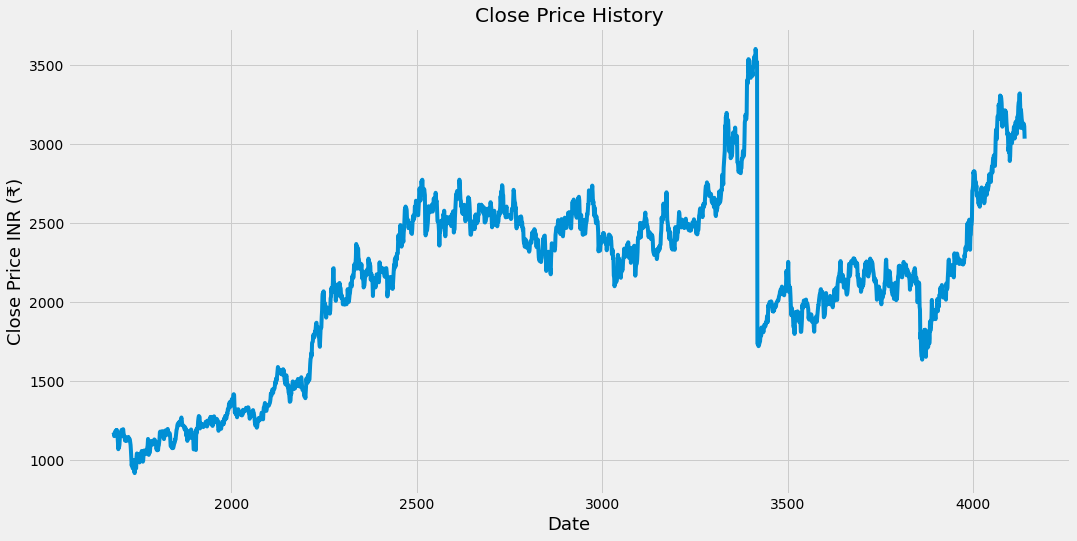

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [6]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1905/1905 [==============================] - 41s 14ms/step - loss: 0.0043
Epoch 2/5
1905/1905 [==============================] - 27s 14ms/step - loss: 0.0013
Epoch 3/5
1905/1905 [==============================] - 28s 15ms/step - loss: 8.7046e-04
Epoch 4/5
1905/1905 [==============================] - 28s 15ms/step - loss: 3.6122e-04
Epoch 5/5
1905/1905 [==============================] - 28s 15ms/step - loss: 0.0012


In [13]:
#Save the model
model.save("TCS_Prediction_model", save_format='h5')

In [14]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [17]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [18]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

46.66113684437986

<ipython-input-19-e17cc2d7a455>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


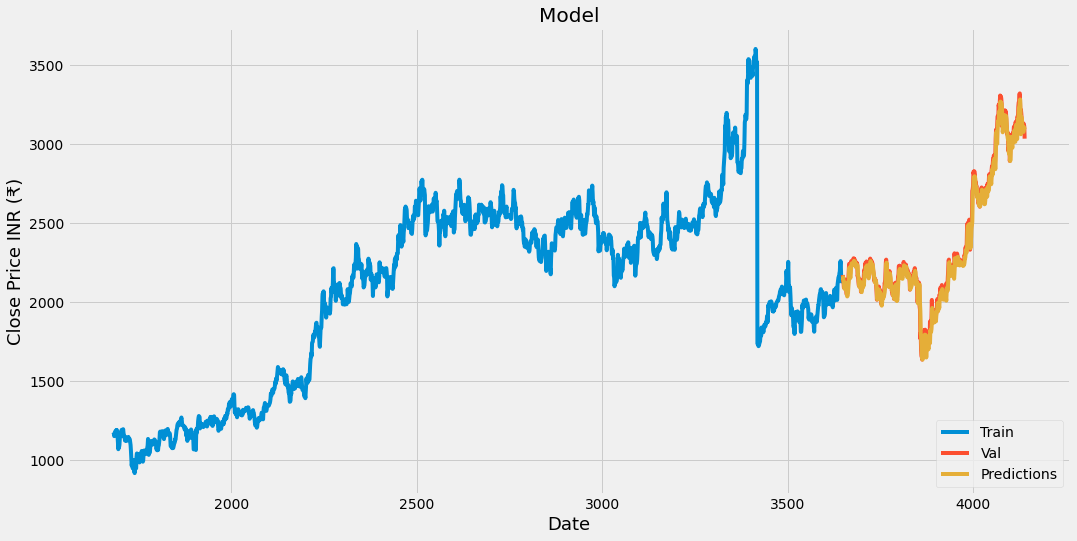

In [19]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('TCS_Predicted_Graph.png')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
3648,2172.55,2140.935547
3649,2135.80,2158.427734
3650,2128.75,2134.870361
3651,2092.35,2120.793945
3652,2095.40,2089.708984
...,...,...
4134,3100.80,3084.589355
4135,3132.00,3078.156494
4136,3124.10,3108.189209
4137,3115.25,3105.663086
